# Pythoch nn.Module
- Pythoch의 신경망 구성을 위한 레이어 혹은 모델을 위한 클래스

In [2]:
from torchviz import make_dot 
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [5]:
class LinearModule(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.fc = nn.Linear(input_dim, output_dim)
    
    def forward(self, x):
        return self.fc(x)

model = LinearModule(3, 2)
x = torch.randn(10, 3)
output = model(x)

print(output)

tensor([[ 0.2523, -0.0923],
        [ 0.1625, -0.9308],
        [ 0.7517,  0.6982],
        [-0.4693, -0.4101],
        [ 0.0990,  0.6411],
        [ 0.2660, -0.4596],
        [-1.4898, -0.9419],
        [-0.0287,  0.3788],
        [ 0.6325, -0.5125],
        [ 1.4953, -0.2033]], grad_fn=<AddmmBackward0>)


### XOR 예측 문제

In [ ]:
class XORModel(nn.Module):
    def __init__(self):
        super(XORModel, self).__init__()
        self.layer1 = nn.Linear(2, 2) # 입력 2개, 출력 2개
        self.layer2 = nn.Linear(2, 1) # 입력 2개, 출력 1개
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        x = self.sigmoid.forward(self.layer1(x))
        x = self.sigmoid.forward(self.layer2(x))
        return x

# 데이터 정의
x_data = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
y_data = torch.tensor([[0], [1], [1], [0]], dtype=torch.float32)
model = XORModel()

# 모델 초기화
criterion = nn.BCELoss() # Binary Cross-Entropy loss
optimizer = optim.SGD(model.parameters(), lr=0.1)

max_epoch = 100000
losses = []
for epoch in range(max_epoch + 1):
    # Forward Padd
    outputs = model(x_data)
    loss = criterion(outputs, y_data)
    
    # Backword and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    losses.append(loss.item())
    
    if epoch % 1000 == 0:
        print(f'epoch: {epoch}/{max_epoch}, Loss: {loss.item():.4f}')

epoch: 0/10000, Loss: 0.6967
epoch: 1000/10000, Loss: 0.6929
epoch: 2000/10000, Loss: 0.6906
epoch: 3000/10000, Loss: 0.6679
epoch: 4000/10000, Loss: 0.5330
epoch: 5000/10000, Loss: 0.2355
epoch: 6000/10000, Loss: 0.0907
epoch: 7000/10000, Loss: 0.0510
epoch: 8000/10000, Loss: 0.0347
epoch: 9000/10000, Loss: 0.0260
epoch: 10000/10000, Loss: 0.0207
tensor([[0.0238],
        [0.9812],
        [0.9812],
        [0.0207]])


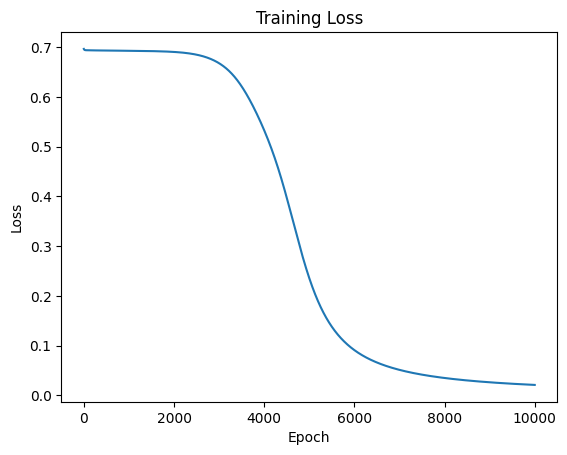

In [11]:
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

In [12]:
with torch.no_grad():
    test = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
    predicted = model(test)
    print(predicted)

tensor([[0.0238],
        [0.9812],
        [0.9812],
        [0.0207]])


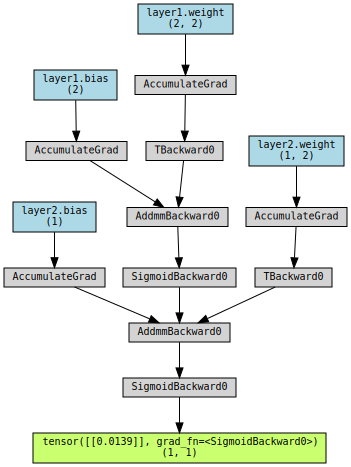

In [13]:
x = torch.randn(1, 2)
y = model(x)
make_dot(y, params={**dict(model.named_parameters()), y:y})